In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# importing libraries

# 1.simple regression 

In [2]:
df= pd.read_csv('new.csv')
df 

,years of experience,salary
0,3,21
1,8,50
2,9,64
3,3,26
4,15,81
5,9,66
6,11,58
7,16,83
8,20,90
9,6,41


In [3]:
df.info()  #about entries of the data set.
df.describe() #describes summary of the data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   years of experience  10 non-null     int64
 1   salary               10 non-null     int64
dtypes: int64(2)
memory usage: 288.0 bytes


,years of experience,salary
count,10.000000,10.000000
mean,10.000000,58.000000
std,5.597619,23.626727
min,3.000000,21.000000
25%,6.500000,43.250000
50%,9.000000,61.000000
75%,14.000000,77.250000
max,20.000000,90.000000


In [4]:
df.isnull().sum() #says about null values and gaps in dataset.

years of experience    0
salary                 0
dtype: int64

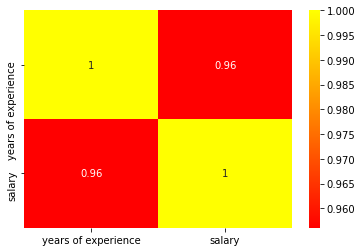

By the graph we can see there is 96% corelation between Hours and Scores
the above theme is Che Guevara captain theme


In [5]:
relation = df.corr()
sns.heatmap(relation, annot=True, cmap='autumn') 
plt.show()
print('By the graph we can see there is 96% corelation between Hours and Scores')
print('the above theme is Che Guevara captain theme')

Text(0, 0.5, 'salary')

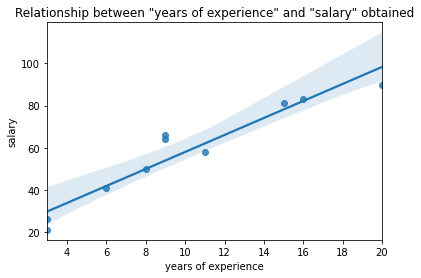

In [6]:
sns.regplot(x=df['years of experience'],y=df['salary'],data=df)
plt.title('Relationship between "years of experience" and "salary" obtained')
plt.xlabel('years of experience')
plt.ylabel('salary')

In [7]:
x= df[['years of experience']].values
y=df[['salary']].values

In [8]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.2,random_state=42)

In [9]:
from sklearn.linear_model import LinearRegression
lm= LinearRegression()
#linear regression algorithm 

In [10]:
lm.fit(xtrain,ytrain)

LinearRegression()

In [11]:
print('Training score')
print(lm.score(xtrain, ytrain))
print('Test score')
print(lm.score(xtest, ytest))
print('here there is good accuracy, the maximum accuracy is "1" ')
# the both values should be similar or near, othervice there will be accuracy error

Training score
0.921452928997686
Test score
0.7055861591695511
here there is good accuracy, the maximum accuracy is "1" 


In [12]:
ypred= lm.predict(xtest)

In [13]:
ytest # these are test case values

array([[90],
       [50]], dtype=int64)

In [14]:
ypred # these are predicted values

array([[105.34117647],
       [ 50.42352941]])

In [15]:
print("No of years of experience   = ",10.5)
print("The salary to be predicted = ",lm.predict([[10.5]])[0])

No of years of experience   =  10.5
The salary to be predicted =  [61.86470588]


In [16]:
from sklearn import metrics  
print('MAE: ',metrics.mean_absolute_error(ytest, ypred))
print('MSE: ', metrics.mean_squared_error(ytest, ypred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(ytest, ypred)))

MAE:  7.882352941176457
MSE:  117.76553633217952
RMSE:  10.851983059891843


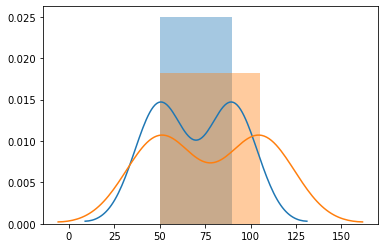

In [17]:
sns.distplot([ytest])
sns.distplot([ypred])

# 2.logistic regression 

In [18]:
data= pd.read_csv('logic.csv')
data 

,Admit,cgpa
0,no,4.2
1,no,5.1
2,no,5.5
3,yes,8.2
4,yes,9.0
5,yes,7.2
6,yes,8.3
7,no,4.0
8,yes,9.2
9,no,6.2


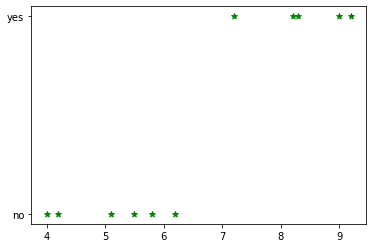

In [19]:
plt.scatter(data.cgpa,data.Admit,marker="*",color='green')

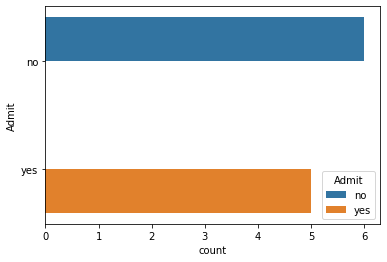

In [20]:
sns.countplot(y='Admit', hue='Admit', data=data)

In [21]:
x= data[['cgpa']].values
y=data[['Admit']].values

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=1)

In [23]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [24]:
model.fit(x_train,y_train)

C:\Users\yeshw\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [25]:
model.score(x_test,y_test) # good accuracy with small dataset

1.0

In [26]:
x_test

array([[5.5],
       [8.2],
       [9. ],
       [6.2]])

In [27]:
y_test

array([['no'],
       ['yes'],
       ['yes'],
       ['no']], dtype=object)

In [28]:
y_val_predictions = model.predict(x_test)

In [29]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

In [30]:
confusion_matrix(y_test,y_val_predictions)

array([[2, 0],
       [0, 2]], dtype=int64)

In [31]:
classification_report(y_test,y_val_predictions)

'              precision    recall  f1-score   support\n\n          no       1.00      1.00      1.00         2\n         yes       1.00      1.00      1.00         2\n\n    accuracy                           1.00         4\n   macro avg       1.00      1.00      1.00         4\nweighted avg       1.00      1.00      1.00         4\n'

In [32]:
accuracy_score(y_test,y_val_predictions)

1.0

# 3.Timeseries analysis on factory production 


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6


In [34]:
dataset = pd.read_csv('Electric_pro.csv')
dataset['DATE'] = pd.to_datetime(dataset['DATE'], infer_datetime_format=True)
indexedDataset = dataset.set_index(['DATE'])

In [35]:
dataset.info()
dataset.describe() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   DATE        397 non-null    datetime64[ns]
 1   production  397 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.3 KB


,production
count,397.000000
mean,88.847218
std,15.387834
min,55.315100
25%,77.105200
50%,89.779500
75%,100.524400
max,129.404800


In [36]:
from datetime import datetime
indexedDataset.tail()

,production
DATE,
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359
2017-12-01,114.7212
2018-01-01,129.4048


#### rolling statistics, window=12 is 12 months period 

In [37]:
rolmean = indexedDataset.rolling(window=12).mean()
rolstd = indexedDataset.rolling(window=12).std()
print(rolmean, rolstd)

            production
DATE                  
1985-01-01         NaN
1985-02-01         NaN
1985-03-01         NaN
1985-04-01         NaN
1985-05-01         NaN
...                ...
2017-09-01  101.234450
2017-10-01  101.411700
2017-11-01  101.782192
2017-12-01  101.944842
2018-01-01  103.157700

[397 rows x 1 columns]             production
DATE                  
1985-01-01         NaN
1985-02-01         NaN
1985-03-01         NaN
1985-04-01         NaN
1985-05-01         NaN
...                ...
2017-09-01    9.155641
2017-10-01    8.968447
2017-11-01    8.671317
2017-12-01    8.911131
2018-01-01   11.454780

[397 rows x 1 columns]


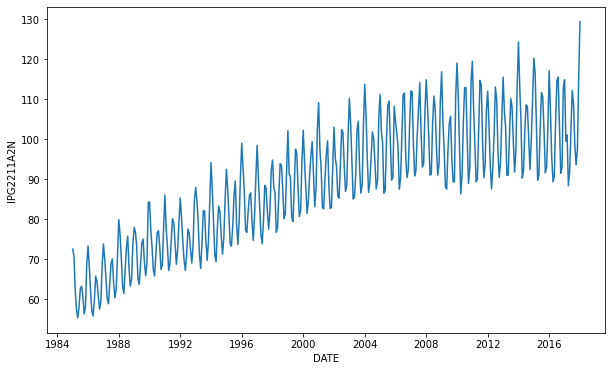

In [38]:
plt.xlabel('DATE')
plt.ylabel('IPG2211A2N')
plt.plot(indexedDataset)

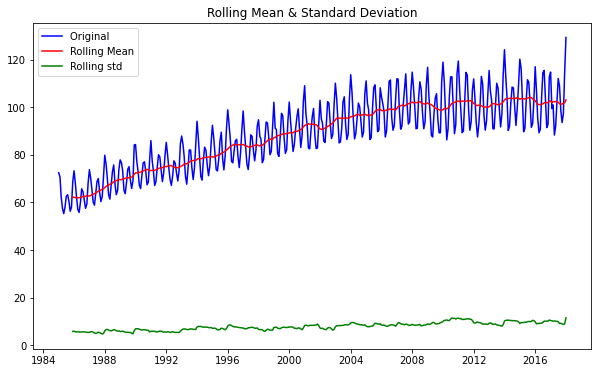

In [39]:
orig = plt.plot(indexedDataset, color='blue',label='Original ')
mean = plt.plot(rolmean, color='red',label='Rolling Mean')
std = plt.plot(rolstd, color='green',label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

## testing the data as it is stationary or non-stationary data

In [62]:
# performing Dicky-fuller test
from statsmodels.tsa.stattools import adfuller

print ('Result of Dickey fuller test:')
dftest = adfuller(indexedDataset ['production'], autolag='AIC')
 
dfoutput =pd.Series(dftest[0:4], index=['Test Statistics','P-value','#Lags used','Number of observations used'])
for key,value in dftest[4].items():
    dfoutput['critical value (%s)'%key] = value

print(dfoutput)

Result of Dickey fuller test:
Test Statistics                 -2.256990
P-value                          0.186215
#Lags used                      15.000000
Number of observations used    381.000000
critical value (1%)             -3.447631
critical value (5%)             -2.869156
critical value (10%)            -2.570827
dtype: float64


## the index is set to time component 

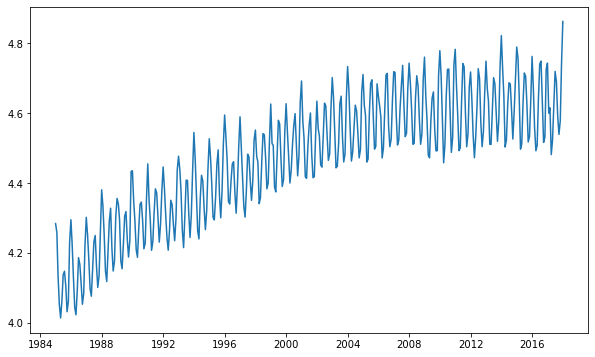

In [41]:
indexedDataset_logscale = np.log(indexedDataset)
plt.plot(indexedDataset_logscale)

## calculating the M.A with the logtime series component 

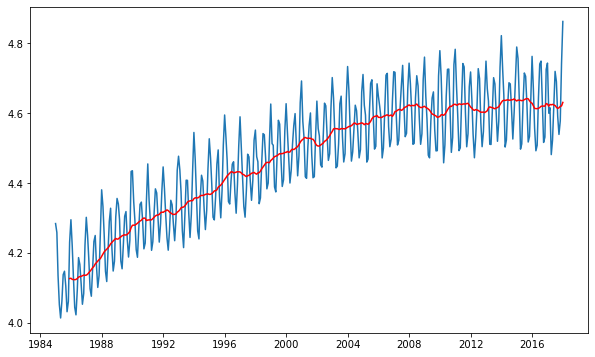

In [42]:
movingAverage = indexedDataset_logscale.rolling(window=12).mean()
movingSTD = indexedDataset_logscale.rolling(window=12).std()
plt.plot(indexedDataset_logscale)
plt.plot(movingAverage, color ='red')

## differencing method and droping nan values

In [43]:
indexedDatasetMa = indexedDataset_logscale - movingAverage
indexedDatasetMa.head(12)

indexedDatasetMa.dropna(inplace=True)
indexedDatasetMa.head(10)

,production
DATE,
1985-12-01,0.103961
1986-01-01,0.167724
1986-02-01,0.095629
1986-03-01,0.007329
1986-04-01,-0.079115
1986-05-01,-0.101472
1986-06-01,-0.033363
1986-07-01,0.055963
1986-08-01,0.034639


In [44]:
from statsmodels.tsa.stattools import adfuller 
def test_stationary(timeseries):

    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    
    
    orig = plt.plot(timeseries, color='blue',label='Original ')
    mean = plt.plot(movingAverage, color='red',label='Rolling Mean')
    std = plt.plot(movingSTD , color='green',label='Rolling std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print ('Result of Dickey fuller test:')
    dftest = adfuller(timeseries['production'], autolag='AIC')
    dfoutput =pd.Series(dftest[0:4], index=['Test Statistics','P-value','#Lags used','Number of observations used'])
    for key,value in dftest[4].items():
        dfoutput['critical value (%s)'%key] = value
    print(dfoutput)

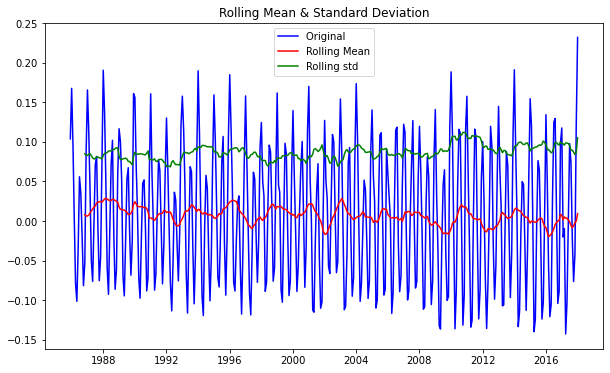

Result of Dickey fuller test:
Test Statistics                 -5.211586
P-value                          0.000008
#Lags used                      15.000000
Number of observations used    370.000000
critical value (1%)             -3.448148
critical value (5%)             -2.869383
critical value (10%)            -2.570948
dtype: float64


In [45]:
test_stationary(indexedDatasetMa)

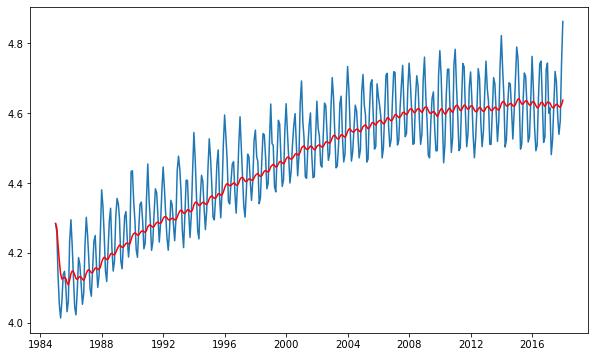

In [46]:
exponentialDecayWeightedAverage = indexedDataset_logscale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logscale)
plt.plot(exponentialDecayWeightedAverage, color='red')

### (method2) testing with weighted average instead of M.A

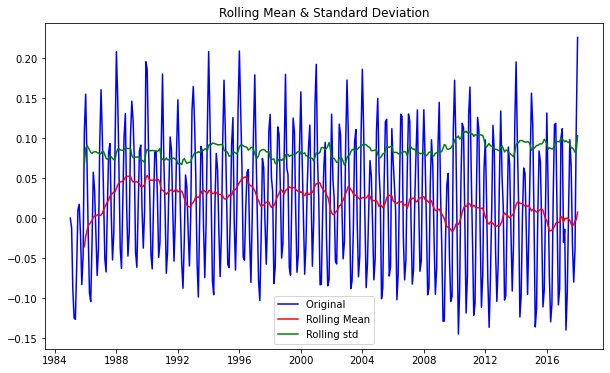

Result of Dickey fuller test:
Test Statistics                 -3.251531
P-value                          0.017189
#Lags used                      15.000000
Number of observations used    381.000000
critical value (1%)             -3.447631
critical value (5%)             -2.869156
critical value (10%)            -2.570827
dtype: float64


In [47]:
indexedDatasetExponentialdecayMa = indexedDataset_logscale - exponentialDecayWeightedAverage
test_stationary(indexedDatasetExponentialdecayMa)

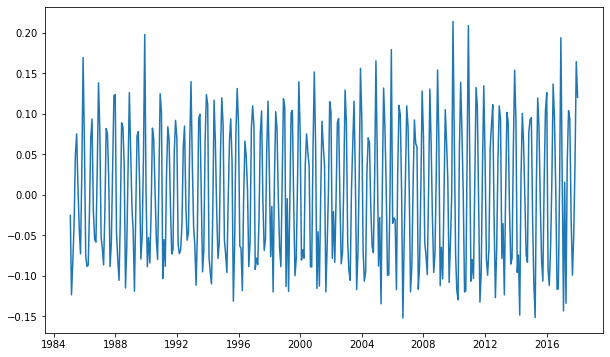

In [48]:
Datasetlogdiffshifting = indexedDataset_logscale - indexedDataset_logscale.shift()
plt.plot(Datasetlogdiffshifting)

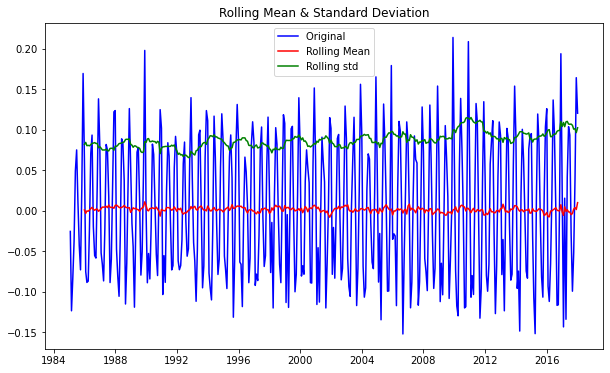

Result of Dickey fuller test:
Test Statistics               -6.748333e+00
P-value                        2.995161e-09
#Lags used                     1.400000e+01
Number of observations used    3.810000e+02
critical value (1%)           -3.447631e+00
critical value (5%)           -2.869156e+00
critical value (10%)          -2.570827e+00
dtype: float64


In [49]:
Datasetlogdiffshifting.dropna(inplace=True)
test_stationary(Datasetlogdiffshifting) 

### Pacf and acf is used to give values in the ARIMA model

C:\Users\yeshw\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


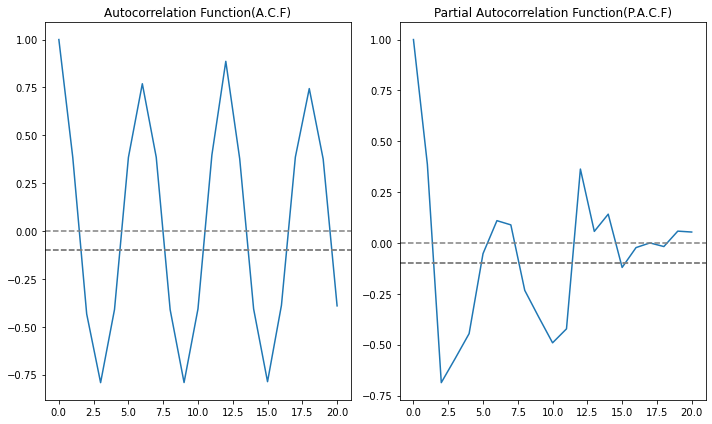

In [50]:
from statsmodels.tsa.stattools import acf,pacf


lag_acf = acf(Datasetlogdiffshifting, nlags=20)
lag_pacf = pacf(Datasetlogdiffshifting, nlags=20, method ='ols')


plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(Datasetlogdiffshifting)),linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(Datasetlogdiffshifting)),linestyle='--',color='gray')
plt.title('Autocorrelation Function(A.C.F)')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(Datasetlogdiffshifting)),linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(Datasetlogdiffshifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function(P.A.C.F)')
plt.tight_layout() 

import warnings 
warnings.filterwarnings('ignore')

## Residual sum of squares values is low, so we got good results 

Plotting AR model


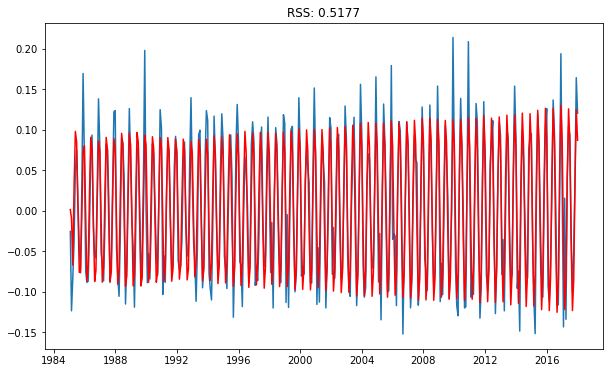

In [66]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(indexedDataset_logscale, order=(2,1,2))
results_ARIMA = model.fit(disp=-1)
plt.plot(Datasetlogdiffshifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues - Datasetlogdiffshifting['production'])**2))
print('Plotting AR model')

Plotting AR model


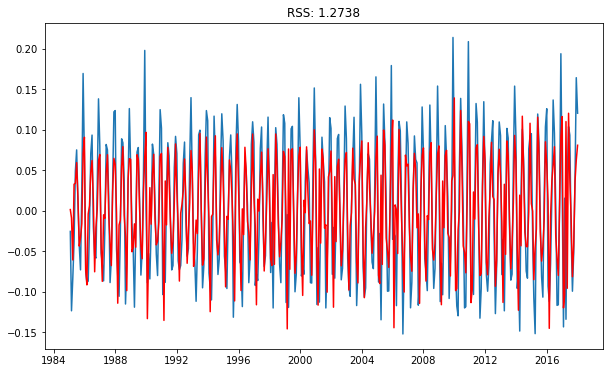

In [67]:
model = ARIMA(indexedDataset_logscale, order=(2,1,0))
results_ARIMA = model.fit(disp=-1)
plt.plot(Datasetlogdiffshifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues - Datasetlogdiffshifting['production'])**2))
print('Plotting AR model')

Text(0.5, 1.0, 'RSS: 0.5177')

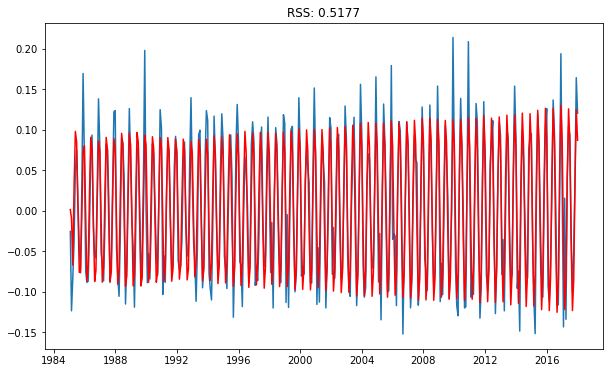

In [68]:
model = ARIMA(indexedDataset_logscale, order=(2,1,2))
results_ARIMA = model.fit(disp=-1)
plt.plot(Datasetlogdiffshifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues - Datasetlogdiffshifting['production'])**2))

In [70]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

DATE
1985-02-01    0.001364
1985-03-01   -0.009703
1985-04-01   -0.067235
1985-05-01    0.030498
1985-06-01    0.097958
dtype: float64


In [71]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

DATE
1985-02-01    0.001364
1985-03-01   -0.008339
1985-04-01   -0.075574
1985-05-01   -0.045077
1985-06-01    0.052881
dtype: float64


## transferring data back to original data

In [72]:
predictions_ARIMA_log = pd.Series(indexedDataset_logscale['production'], index=indexedDataset_logscale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value = 0)
predictions_ARIMA_log.head()

DATE
1985-01-01    4.283658
1985-02-01    4.259413
1985-03-01    4.126030
1985-04-01    3.975713
1985-05-01    3.967969
dtype: float64

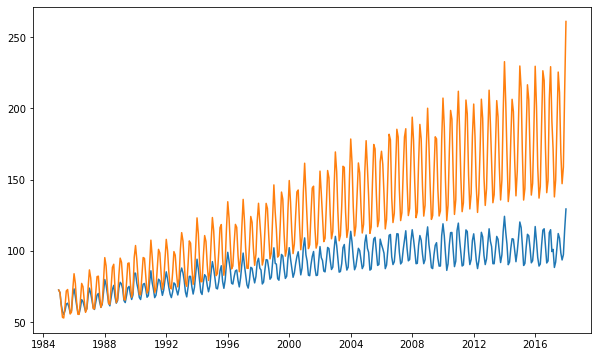

In [73]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)

In [74]:
indexedDataset_logscale

,production
DATE,
1985-01-01,4.283658
1985-02-01,4.258049
1985-03-01,4.134369
1985-04-01,4.051287
1985-05-01,4.013046
...,...
2017-09-01,4.591227
2017-10-01,4.539177
2017-11-01,4.578168


## Comparison between predicted and Actual values 

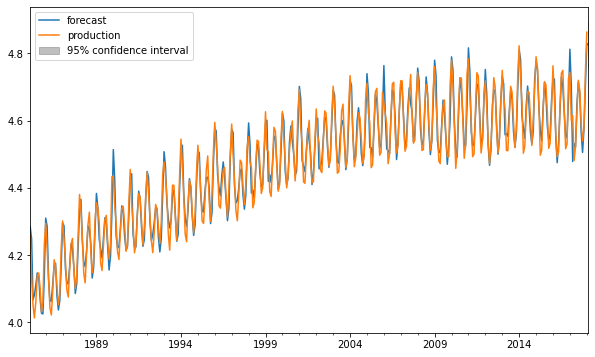

In [75]:
results_ARIMA.plot_predict(1,397)
x=results_ARIMA.forecast(steps=100)

## prediction on next 8 Years production 

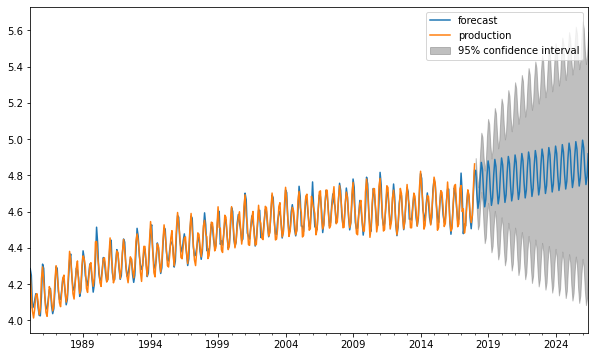

In [76]:
results_ARIMA.plot_predict(1,497)
x=results_ARIMA.forecast(steps=100)

In [77]:
results_ARIMA.forecast(steps=100)

(array([4.8253992 , 4.70216045, 4.61791233, 4.6583059 , 4.7842701 ,
        4.8711242 , 4.83333904, 4.71010516, 4.62610074, 4.66673298,
        4.79269201, 4.87930233, 4.84127872, 4.71805029, 4.63428973,
        4.67516022, 4.8011135 , 4.88747987, 4.84921823, 4.72599585,
        4.64247932, 4.68358762, 4.80953457, 4.89565682, 4.85715758,
        4.73394183, 4.6506695 , 4.69201519, 4.8179552 , 4.90383319,
        4.86509677, 4.74188824, 4.65886026, 4.70044291, 4.82637541,
        4.91200896, 4.8730358 , 4.74983508, 4.66705161, 4.7088708 ,
        4.8347952 , 4.92018415, 4.88097467, 4.75778235, 4.67524355,
        4.71729885, 4.84321455, 4.92835876, 4.88891338, 4.76573004,
        4.68343608, 4.72572705, 4.85163348, 4.93653277, 4.89685193,
        4.77367817, 4.69162919, 4.73415541, 4.86005197, 4.94470621,
        4.90479033, 4.78162672, 4.69982288, 4.74258392, 4.86847004,
        4.95287905, 4.91272858, 4.7895757 , 4.70801716, 4.75101258,
        4.87688767, 4.96105132, 4.92066667, 4.79